We just rewrite the code from [last week](../01.Regressions/LinReg.ipynb) using pytorch library

In [68]:
import torch
from matplotlib import pyplot as plt

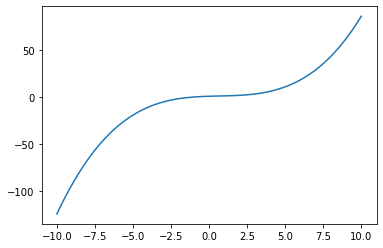

In [69]:
param = torch.tensor([1., 0.5, -0.2, 0.1])
data1 = torch.linspace(-10., 10., 101) 

design1 = torch.stack([data1**power for power in range(len(param))]).T

target1 = design1 @ param
plt.plot(data1, target1)
plt.show()

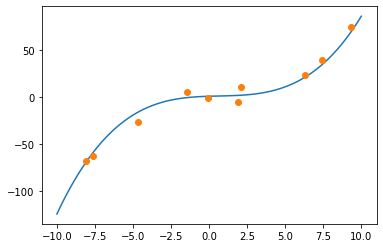

In [70]:
data0 = torch.rand(10)*20. - 10
design0 = torch.stack([data0**power for power in range(len(param))]).T 
target0 = design0 @ param  + torch.rand(10)*20. - 10

plt.plot(data1, target1)
plt.plot(data0, target0, 'o')
plt.show()

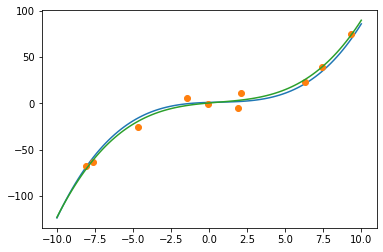

In [71]:
param, _ = torch.solve(design0.T @ target0.unsqueeze(1), design0.T @ design0 )
# alternatively (design0.T @ target0)[:,None] or (design0.T @ target0).reshape(4,1)
# _ ignores the second output object
value1 = design1 @ param

plt.plot(data1, target1)
plt.plot(data0, target0, 'o')
plt.plot(data1, value1)
plt.show()

In [52]:
param = torch.zeros(4, requires_grad= True)
value0 = design0 @ param
loss = torch.sum((value0-target0)**2)
grad = 2. * (value0 - target0) @ design0

loss.backward()
print(param.grad)
print(grad)

tensor([ 1.2694e+02, -5.8893e+03,  1.4184e+04, -4.4608e+05])
tensor([ 1.2694e+02, -5.8893e+03,  1.4184e+04, -4.4608e+05],
       grad_fn=<SqueezeBackward3>)


In [79]:
param = torch.zeros(4, requires_grad = True)

optimizer = torch.optim.SGD([param], lr = 10**(-7))
for epoch in range(1000):
    value0 = design0 @ param
    loss = torch.sum((value0-target0)**2)
    loss.backward()

#     with torch.no_grad():
#         param -= 10**(-7) * param.grad
    optimizer.step()

#     param.grad.zero_()
    optimizer.zero_grad()
    
    print(epoch, loss.item())


0 17197.216796875
1 9463.7509765625
2 5408.46826171875
3 3280.886474609375
4 2163.603759765625
5 1575.8226318359375
6 1265.56298828125
7 1100.765380859375
8 1012.21923828125
9 963.652099609375
10 936.0540771484375
11 919.4619140625
12 908.6538696289062
13 900.8941040039062
14 894.7471313476562
15 889.4618530273438
16 884.6435546875
17 880.0859375
18 875.6806030273438
19 871.370361328125
20 867.125244140625
21 862.929443359375
22 858.7745971679688
23 854.6558837890625
24 850.571533203125
25 846.52001953125
26 842.4994506835938
27 838.51025390625
28 834.5519409179688
29 830.6242065429688
30 826.7264404296875
31 822.8582153320312
32 819.0196533203125
33 815.2106323242188
34 811.4307861328125
35 807.679931640625
36 803.95751953125
37 800.263916015625
38 796.5984497070312
39 792.9609985351562
40 789.3515014648438
41 785.76953125
42 782.2147216796875
43 778.6876831054688
44 775.1871337890625
45 771.713623046875
46 768.2666015625
47 764.845947265625
48 761.4515380859375
49 758.0831909179688
5

754 322.7759094238281
755 322.7601013183594
756 322.7443542480469
757 322.72869873046875
758 322.7132263183594
759 322.69775390625
760 322.68255615234375
761 322.6673889160156
762 322.6523132324219
763 322.6373291015625
764 322.62249755859375
765 322.60772705078125
766 322.5931396484375
767 322.5784912109375
768 322.5640869140625
769 322.5497131347656
770 322.5355224609375
771 322.52142333984375
772 322.50738525390625
773 322.49346923828125
774 322.4795837402344
775 322.4658203125
776 322.4522705078125
777 322.438720703125
778 322.4252624511719
779 322.4118957519531
780 322.3985900878906
781 322.385498046875
782 322.37237548828125
783 322.35943603515625
784 322.34649658203125
785 322.3337097167969
786 322.321044921875
787 322.30841064453125
788 322.29583740234375
789 322.28338623046875
790 322.27105712890625
791 322.2587890625
792 322.2467041015625
793 322.2345886230469
794 322.2225646972656
795 322.2105407714844
796 322.1987609863281
797 322.18707275390625
798 322.17535400390625
799 3

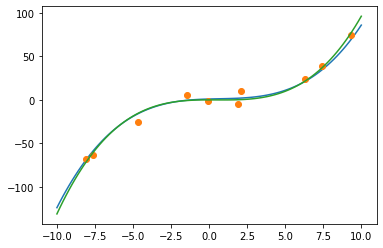

In [78]:
value1 = design1 @ param
value1.detach_()

plt.plot(data1, target1)
plt.plot(data0, target0, 'o')
plt.plot(data1, value1)
plt.show()